# Libraries Used

In [ ]:
import requests
from bs4 import BeautifulSoup

# Web Scraping and HTML Manipulation
This python code encapsulates functionalities for web scraping and HTML manipulation through three main classes:

# WebScraper Class
This class initializes a URL and a user agent, essential for web scraping. Using the requests library, it fetches the HTML content from the provdied URL, and then uses **BeautifulSoup from the bs4 library** to parse and create a structured representation of the HTML content.

**HTMLManipulator Class**
This class offers an array of methods for extracting specific HTML elements such as paragraph tags, title tags, links, and more. It enables actions like accessing text, changing content, or extracting information based on various HTML tags. These operations rely on the capabilities of BeautifulSoup for HTML parsing and manipulation.

**TableAnalyzer Class**
Focused on table-specific operations within HTML, the TableAnalyzer class allows for the extraction of table information, including the number of tables, rows, and columns in the parsed HTML. It also helps in getting specific cell content and overall table details using the same BeautifulSoup library.

**Libraries Used:**

-> **Requests Library**: Uses HTTP requests to fetch the HTML content from a given URL

-> **BeautifulSoup Library**: Provides tools for parsing HTML and XML documents, offering methods to navigate, search, and manipulate the parsed HTML content.
       
-> The **main function** acts as an interactive menu, offering users a range of options to extract specific HTML elements, retrieve table information, and perform various HTML manipulations. This code relies on the functionality provided by the requests and BeautifulSoup libraries for web scraping and HTML parsing, making it a best tool for extracting and manipulating data from web pages.



In [5]:
class WebScraper:
    def __init__(self, url, user_agent):
        # initializing the url and the user agent
        self.url = url
        self.user_agent = user_agent
        self.headers = {'User-Agent': self.user_agent}  
        # initializing a var to store the html content
        self.html_content = None 
        # initializing a variable to store parsed HTML using beautiful soup
        self.soup = None  

    def fetch_html(self):
        # fetching HTML content from the url using requests
        response = requests.get(self.url, headers=self.headers)
        # storing the HTML content in the class variable
        self.html_content = response.text  

    def create_soup(self):
        # creating a veautifulsoup object for parsing the HTML content
        self.soup = BeautifulSoup(self.html_content, "html.parser")

class HTMLManipulator:
    def __init__(self, soup):
        # initializing the class with a beautiful soup object
        self.soup = soup

    def get_paragraph_tags(self):
        # fetcing all paragraph tags
        paragraph_tags = self.soup.find_all('p')
        return paragraph_tags

    def get_title_tags(self):
        # fetching all title tags
        title_tags = self.soup.find_all('title')
        return title_tags

    def get_h2_tags(self):
        # fetching all h2 tags
        h2_tags = self.soup.find_all('h2')
        return h2_tags

    def get_link_tags(self):
        # fetching all link tags
        link_tags = self.soup.find_all('a')
        return link_tags

    def get_h1_h2_h3_tags(self):
        # fetching all h1, h2, h3 tags
        h1_tags = self.soup.find_all('h1')
        h2_tags = self.soup.find_all('h2')
        h3_tags = self.soup.find_all('h3')
        return h1_tags, h2_tags, h3_tags

    def get_all_text(self):
        # fetching all text from HTML
        all_text = self.soup.get_text()
        return all_text

    def get_all_html_tags(self):
        # fetching names of all HTML tags
        tags = [tag.name for tag in self.soup.find_all()]
        unique_tags = list(set(tags))
        return unique_tags

    def get_html_of_element(self, element):
        # fetching HTML code of a specific element
        return str(element)

    def get_text_of_element(self, element):
        # fetching text of a specific element
        return element.get_text()

    def get_parent_html_of_element(self, element):
        # fetching html code of the parent of a specific element
        return str(element.parent)

    def get_children_of_html(self):
        # fetching children of the html tag
        return [child for child in self.soup.find('html').children if child.name is not None]

    def get_descendants_of_body(self):
        # fetching all descendants of the body tag
        return [descendant for descendant in self.soup.body.descendants if descendant.name is not None]

    def get_first_paragraph_text(self):
        # fetching text from the first paragraph tag
        first_paragraph = self.soup.find('p')
        if first_paragraph:
            return first_paragraph.get_text()
        else:
            return None

    def get_length_of_first_h2_text(self):
        # finding the length of text in the first <h2> tag
        first_h2 = self.soup.find('h2')
        if first_h2:
            return len(first_h2.get_text())
        else:
            return 0

    def get_text_of_first_a_tag(self):
        # finding the text of the first <a> tag
        first_a_tag = self.soup.find('a')
        if first_a_tag:
            return first_a_tag.get_text()
        else:
            return None

    def get_href_of_first_a_tag(self):
        # finding the href of the first <a> tag
        first_a_tag = self.soup.find('a')
        if first_a_tag:
            return first_a_tag.get('href')
        else:
            return None

    def extract_all_urls(self):
        # fetching all URLs from the webpage
        links = self.soup.find_all('a')
        urls = [link.get('href') for link in links if link.get('href') is not None]
        return urls

    def find_all_h2_tags(self):
        # finding all h2 tags and list them
        h2_tags = self.soup.find_all('h2')
        return h2_tags

    def get_li_tags(self):
        # finding and printing all li tags
        li_tags = self.soup.find_all('li')
        return li_tags

    def find_element_by_content(self, content):
        # displaying content of elements that contain a specified string
        elements_with_content = self.soup.find_all(lambda tag: content in tag.get_text())
        return elements_with_content

    def find_element_by_id(self, element_id):
        # displaying the element(s) that have a specific id
        element = self.soup.find(id = element_id)
        return element

    def create_pretty_soup(self):
         
        #generating a well-formatte anf human readable Unicode string representation of the parsed HTML content 
        return self.soup.prettify()
    
    def find_tag_by_attribute_value(self, tag_name, attribute, value):
        # finding the first tag with a given attribute value
        tag = self.soup.find(tag_name, {attribute: value})
        return tag

    def find_tags_by_css_class(self, css_class):
        # finding tags by CSS class
        tags = self.soup.find_all(class_ = css_class)
        return tags

    def change_tag_contents(self, tag_name, new_content):
        # changing the tag's contents and replacing with the given string
        tag = self.soup.find(tag_name)
        if tag:
            tag.string = new_content
            return str(tag)
        else:
            return None

    def add_to_tag_contents(self, tag_name, addition):
        # adding to a tag's contents
        tag = self.soup.find(tag_name)
        if tag:
            tag.append(addition)
            return str(tag)
        else:
            return None

    def insert_text_in_url(self, url_index, text, position):
        # adding a new text within a URL in a specified position
        links = self.soup.find_all('a')
        if len(links) > url_index:
            link = links[url_index]
            url = link.get('href')
            if url:
                modified_url = url[:position] + text + url[position:]
                link['href'] = modified_url
                return str(self.soup)
        return None

    def insert_before_tag(self, target_tag, new_tag):
        # adding tags or strings immediately before specified tags or strings
        tag = self.soup.find(target_tag)
        if tag:
            tag.insert_before(new_tag)
            return str(self.soup)
        else:
            return None

    def insert_after_tag(self, target_tag, new_tag):
        # adding tags or strings immediately after specified tags or strings
        tag = self.soup.find(target_tag)
        if tag:
            tag.insert_after(new_tag)
            return str(self.soup)
        else:
            return None

    def remove_tag_contents(self, tag_name):
        # removing the contents of a tag
        tag = self.soup.find(tag_name)
        if tag:
            tag.clear()
            return str(self.soup)
        else:
            return None

    def extract_tag(self, tag_name):
        # fetching a tag or string from a given tree
        tag = self.soup.find(tag_name)
        if tag:
            extracted_tag = tag.extract()
            return str(extracted_tag)
        else:
            return None

    def remove_tag(self, tag_name):
        # removing a tag from a given tree of HTML document and destroying it and its contents
        tag = self.soup.find(tag_name)
        if tag:
            tag.decompose()
            return str(self.soup)
        else:
            return None

    def remove_and_replace_tag(self, tag_name, replacement):
        # removing a tag from a given tree of HTML document and replacing it with the given tag or string
        tag = self.soup.find(tag_name)
        if tag:
            tag.replace_with(replacement)
            return str(self.soup)
        else:
            return None

    def wrap_element(self, tag_name, wrapper):
        # wrapping an element in the specified tag and creating the new wrapper
        element = self.soup.find(tag_name)
        if element:
            element.wrap(wrapper)
            return str(self.soup)
        else:
            return None

    def replace_tag_with_contents(self, target_tag, source_tag):
        # replacing a given tag with whatever's inside a given tag
        target = self.soup.find(target_tag)
        source = self.soup.find(source_tag)
        if target and source:
            target.replace_with(source.contents)
            return str(self.soup)
        else:
            return None

        
class TableAnalyzer:
    def __init__(self, soup):
        self.soup = soup

    def get_tables_info(self):
        # fetching the tables conten and rows and columns and cells information
        tables = self.soup.find_all('table')
        tables_info = []

        for table in tables:
            table_info = {
                'rows': len(table.find_all('tr')),
                'columns': len(table.find_all(['th', 'td']))
            }
            tables_info.append(table_info)

        return tables_info

    
    def get_table_content(self):
        # getting content of a specific table by index
        tables = self.soup.find_all('table')
        num_tables = len(tables)

        if num_tables == 0:
            return "No tables found on the page."

        table_index = int(input(f"Enter the table index (0 to {num_tables - 1}): "))
        if 0 <= table_index < num_tables:
            table = tables[table_index]
            rows = table.find_all('tr')
            table_data = []

            for row in rows:
                columns = row.find_all(['th', 'td'])
                row_data = [column.get_text(strip = True) for column in columns]
                table_data.append(row_data)

            return table_data
        else:
            return "Invalid table index!! Please try a valid one"
        

    def get_specific_cell_content(self):
        # getting content of a specific cell in a table
        table_index = int(input("Enter table index: "))
        row_index = int(input("Enter row index: "))
        column_index = int(input("Enter column index: "))

        tables = self.soup.find_all('table')
        if len(tables) > table_index:
            table = tables[table_index]
            rows = table.find_all('tr')
            if len(rows) > row_index:
                columns = rows[row_index].find_all(['th', 'td'])
                if len(columns) > column_index:
                    return columns[column_index].get_text(strip = True)
        return None

    def get_number_of_tables(self):
        # getting the number of tables in the HTML content
        tables = self.soup.find_all('table')
        return len(tables)
    
    def get_number_of_rows_in_table(self):
        table_index = int(input("Enter the table index: "))
        tables = self.soup.find_all('table')
        if len(tables) > table_index:
            table = tables[table_index]
            rows = table.find_all('tr')
            return len(rows)
        else:
            return None

    def get_number_of_columns_in_table(self):
        table_index = int(input("Enter Table index: "))
        tables = self.soup.find_all('table')
        if len(tables) > table_index:
            table = tables[table_index]
            rows = table.find_all('tr')
            if rows:
                columns = rows[0].find_all(['th', 'td'])
                return len(columns)
        return None


def main_menu(h1, t1):
    print("========= MAIN MENU =========")
    print("Enter 1 to get Paragraph tags")
    print("Enter 2 to get Title tags")
    print("Enter 3 to get H2 tags")
    print("Enter 4 to get Link tags")
    print("Enter 5 to get H1, H2, H3 tags")
    print("Enter 6 to get All text")
    print("Enter 7 to get All HTML tags")
    print("Enter 8 to get HTML of Element")
    print("Enter 9 to get Text of Element")
    print("Enter 10 to get Parent HTML of element")
    print("Enter 11 to get Children of HTML")
    print("Enter 12 to get Descendants of body")
    print("Enter 13 to get First Paragraph text")
    print("Enter 14 to get Length of First H2 text")
    print("Enter 15 to get Text of First tag")
    print("Enter 16 to get Href of First tag")
    print("Enter 17 to extract All URLs")
    print("Enter 18 to find All H2 tags")
    print("Enter 19 to get All LI tags")
    print("Enter 20 to find Element by Content")
    print("Enter 21 to find Element by id")
    print("Enter 22 to create Pretty Soup")
    print("Enter 23 to get Tables Info")
    print("Enter 24 to get Table Content")
    print("Enter 25 to get Specific Cell Content")
    print("Enter 26 to get Number of tables")
    print("Enter 27 to get Number of Rows in table")
    print("Enter 28 to get Number of Columns in table")
    print("99. Exit")

    choice = input("Your Choice: ")

    menu_options = {
        '1': h1.get_paragraph_tags,
        '2': h1.get_title_tags,
        '3': h1.get_h2_tags,
        '4': h1.get_link_tags,
        '5': h1.get_h1_h2_h3_tags,
        '6': h1.get_all_text,
        '7': h1.get_all_html_tags,
        '8': h1.get_html_of_element,
        '9': h1.get_text_of_element,
        '10': h1.get_parent_html_of_element,
        '11': h1.get_children_of_html,
        '12': h1.get_descendants_of_body,
        '13': h1.get_first_paragraph_text,
        '14': h1.get_length_of_first_h2_text,
        '15': h1.get_text_of_first_a_tag,
        '16': h1.get_href_of_first_a_tag,
        '17': h1.extract_all_urls,
        '18': h1.find_all_h2_tags,
        '19': h1.get_li_tags,
        '20': h1.find_element_by_content,
        '21': h1.find_element_by_id,
        '22': h1.create_pretty_soup,
        '23': t1.get_tables_info,
        '24': t1.get_table_content,
        '25': t1.get_specific_cell_content,
        '26': t1.get_number_of_tables,
        '27': t1.get_number_of_rows_in_table,
        '28': t1.get_number_of_columns_in_table,
        '99': exit_program,
    }

    select = menu_options.get(choice)
    if select :
        result = select()
        print(f"Result: {result}")
    else:
        print("Invalid entry! Please try Again!! ")

def exit_program():
    print("Terminating the Program! ")
def html_operations(choice, h1):
    if choice == "1":
        return h1.get_paragraph_tags()
    elif choice == "2":
        return h1.get_title_tags()
    elif choice == "3":
        return h1.get_h2_tags()
    elif choice == "4":
        return h1.get_link_tags()
    elif choice == "5":
        return h1.get_h1_h2_h3_tags()
    elif choice == "6":
        return h1.get_all_text()
    elif choice == "7":
        return h1.get_all_html_tags()
    elif choice == "8":
        return h1.get_html_of_element()
    elif choice == "9":
        return h1.get_text_of_element()
    elif choice == "10":
        return h1.get_parent_html_of_element()
    elif choice == "11":
        return h1.get_children_of_html()
    elif choice == "12":
        return h1.get_descendants_of_body()
    elif choice == "13":
        return h1.get_first_paragraph_text()
    elif choice == "14":
        return h1.get_length_of_first_h2_text()
    elif choice == "15":
        return h1.get_text_of_first_a_tag()
    elif choice == "16":
        return h1.get_href_of_first_a_tag()
    elif choice == "17":
        return h1.extract_all_urls()
    elif choice == "18":
        return h1.find_all_h2_tags()
    elif choice == "19":
        return h1.get_li_tags()
    elif choice == "20":
        return h1.find_element_by_content()
    elif choice == "21":
        return h1.find_element_by_id()
    elif choice == "22":
        return h1.create_pretty_soup()
    else:
        return "Invalid entry! Please try valid choice! "

def table_operations(choice, t1):
    if choice == '23':
        return t1.get_tables_info()
    elif choice == '24':
        return t1.get_table_content()  
    elif choice == '25':
        return t1.get_specific_cell_content()  
    elif choice == '26':
        return t1.get_number_of_tables()
    elif choice == '27':
        return t1.get_number_of_rows_in_table()  
    elif choice == '28':
        return t1.get_number_of_columns_in_table()  
    else:
        return "Invalid choice! Please enter a valid number! "


    
def main():
    url = "https://www.coingecko.com/en"
    user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36"

    obj1 = WebScraper(url, user_agent)
    obj1.fetch_html()
    obj1.create_soup()

    h1 = HTMLManipulator(obj1.soup)
    t1 = TableAnalyzer(obj1.soup)
    
    while True:
        main_menu(h1, t1)
        choice = input("Your Choice: ")

        if choice == '99':
            exit_program()
            break
            
        elif choice in [str(i) for i in range(1, 22)]:
            h2 = html_operations(choice, h1)
            
            if h2:
                print(f"Result: {h2}")
                
        elif choice in [str(i) for i in range(23, 37)]:
            t2 = table_operations(choice, t1)
            
            if t2:
                print(f"Result: {t2}")
        else:
            print("Invalid choice. Please enter a valid option.")


if __name__ == "__main__":
    main()

========= MAIN MENU =========
Enter 1 to get Paragraph tags
Enter 2 to get Title tags
Enter 3 to get H2 tags
Enter 4 to get Link tags
Enter 5 to get H1, H2, H3 tags
Enter 6 to get All text
Enter 7 to get All HTML tags
Enter 8 to get HTML of Element
Enter 9 to get Text of Element
Enter 10 to get Parent HTML of element
Enter 11 to get Children of HTML
Enter 12 to get Descendants of body
Enter 13 to get First Paragraph text
Enter 14 to get Length of First H2 text
Enter 15 to get Text of First tag
Enter 16 to get Href of First tag
Enter 17 to extract All URLs
Enter 18 to find All H2 tags
Enter 19 to get All LI tags
Enter 20 to find Element by Content
Enter 21 to find Element by id
Enter 22 to create Pretty Soup
Enter 23 to get Tables Info
Enter 24 to get Table Content
Enter 25 to get Specific Cell Content
Enter 26 to get Number of tables
Enter 27 to get Number of Rows in table
Enter 28 to get Number of Columns in table
99. Exit
Your Choice: 1
Result: [<p class="tw-font-normal tw-text-gray-

Your Choice: 4
Result: [<a href="https://bit.ly/zash-acquisition" rel="“noopener”" target="“_blank”"><b>CoinGecko Acquires Zash</b></a>, <a href="/en/privacy">Privacy Policy</a>, <a class="tw-cursor-pointer tw-font-semibold tw-no-underline tw-text-slate-700 hover:tw-text-primary-500 dark:tw-text-moon-50 dark:hover:tw-text-primary-400" data-view-component="true" href="/">
11,247
</a>, <a class="tw-cursor-pointer tw-font-semibold tw-no-underline tw-text-slate-700 hover:tw-text-primary-500 dark:tw-text-moon-50 dark:hover:tw-text-primary-400" data-view-component="true" href="/en/exchanges">
939
</a>, <a class="tw-cursor-pointer tw-font-semibold tw-no-underline tw-text-slate-700 hover:tw-text-primary-500 dark:tw-text-moon-50 dark:hover:tw-text-primary-400" data-view-component="true" href="/en/global-charts">
<span class="no-wrap" data-abbreviated="true" data-price-btc="39201518.40818729" data-target="price.price">
$1.557T
</span>
</a>, <a class="tw-cursor-pointer tw-font-semibold tw-no-unde

KeyboardInterrupt: Interrupted by user

# Cryptocurrency Data Fetching

The following code uses the requests library to fetch market chart data for **Bitcoin, Ethereum, and Ripple** from the CoinGecko API. The fetch_crypto_data function constructs API URLs for each cryptocurrency, retrieves the data, and prints it if successful. If data retrieval fails, it prints an error message for the specific cryptocurrency.

This code handles data retrieval and display for Bitcoin, Ethereum, and Ripple, indicating success or failure in fetching each cryptocurrency's data.

In [7]:
import requests

# function for getting data of a cryptocurrency

def fetch_crypto_data(crypto):
    
    # API URL for getting cryptocurrency data
    url = f"https://api.coingecko.com/api/v3/coins/{crypto}/market_chart"
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36 OPR/81.0.4196.61'
    }
    
     # parameters for the API request
    params = {
        "vs_currency": "usd",
        "days": "max",
        "interval": "daily"
    }

     #get request to API 
    response = requests.get(url, headers=headers, params=params)

    # cheking if the request was successful 
    if response.status_code == 200:
        # converting the response to JSON format
        data = response.json()
        # returning fetched data
        return data
    else:
        # indicating that data has not been fetched
        print(f"Failed to fetch data for {crypto}")
        return None

# fetched data for Bitcoin, Ethereum, and Ripple
crypto_data_bitcoin = fetch_crypto_data('bitcoin')
crypto_data_ethereum = fetch_crypto_data('ethereum')
crypto_data_ripple = fetch_crypto_data('ripple')

if crypto_data_bitcoin is not None:
    print("Bitcoin Data:")
    
    print(crypto_data_bitcoin)
else:
    print("Failed to fetch Bitcoin data!! ")
    
if crypto_data_ethereum is not None:
    print("Ethereum Data:")
    print(crypto_data_ethereum)
else:
    print("Failed to fetch Ethereum data!! ")
    
if crypto_data_ripple is not None:
    print("Ripple Data:")
    print(crypto_data_ripple)
else:
    print("Failed to fetch Ripple data!! ")


Bitcoin Data:
{'prices': [[1367107200000, 135.3], [1367193600000, 141.96], [1367280000000, 135.3], [1367366400000, 117.0], [1367452800000, 103.43], [1367539200000, 91.01], [1367625600000, 111.25], [1367712000000, 116.79], [1367798400000, 118.33], [1367884800000, 106.4], [1367971200000, 112.64], [1368057600000, 113.0], [1368144000000, 118.78], [1368230400000, 113.01], [1368316800000, 114.713], [1368403200000, 117.18], [1368489600000, 114.5], [1368576000000, 114.156], [1368662400000, 115.5], [1368748800000, 123.1], [1368835200000, 123.88], [1368921600000, 120.501], [1369008000000, 122.58], [1369094400000, 122.9], [1369180800000, 123.0], [1369267200000, 125.748], [1369353600000, 131.7], [1369440000000, 130.77], [1369526400000, 134.6], [1369612800000, 128.985], [1369699200000, 129.179], [1369785600000, 132.13], [1369872000000, 127.401], [1369958400000, 127.98], [1370044800000, 129.09], [1370131200000, 121.3], [1370217600000, 121.16], [1370390400000, 121.309], [1370476800000, 121.714], [137

# Cryptocurrency Price Data Fetching and Storage
The following code deals with the fetchhing and storage of cryptocurrency price data using CoinGecko's API. The functionality of this code is: a function **fetch_data** that takes a cryptocurrency symbol (e.g., Bitcoin, Ethereum, Ripple) as input. It constructs the appropriate API endpoint with parameters specifying fetching data against the USD, for the maximum available days, on daily basis. The function then sends a **GET** request to the API, retrieves the price data, and organizes it into a **Pandas DataFrame**. If successful, it converts the timestamp to a datetime format and returns the DataFrame with the cryptocurrency price information. Also, it fetches data for Bitcoin, Ethereum, and Ripple using this function. Upon successful retrieval of all cryptocurrency data, the script merges this data into a signle DataFrame based on timestamps. Finally, it saves this combined cryptocurrency price data into a CSV file named **'data.csv'**. If any data fetching encounters an issue, the script provides an error message asking the user to check their connection or the API availability. 

The code uses:

requests library for API interactions 
Pandas for data manipulation and storage

In [6]:
import requests
import pandas as pd

# function for getting data of a cryptocurrency and storing it in a dataframe

def fetch_data(crypto):
    
    # API URL for getting cryptocurrency data
    url = f"https://api.coingecko.com/api/v3/coins/{crypto}/market_chart"
    
    # parameters for the API request
    params = {
        # cryptocurrency to compare against (in this case, USD)
        "vs_currency": "usd",  
        
         # getting data for maximum number of available days
        "days": "max",  
        
        # getting data on a daily interval
        "interval": "daily"    
    }

    #get request to API 
    response = requests.get(url, params=params)

    # cheking if the request was successful 
    if response.status_code == 200:
        # converting the response to JSON format
        data = response.json()
        
        # creating a dataframe from the 'prices' data 
        df = pd.DataFrame(data['prices'], columns=['timestamp', f'{crypto}_price'])
        
        # converting the 'timestamp' column to datetime format
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        
        # returning the dataframe with cryptocurrency price data
        return df  
    else:
        # if data getting fails dispalying an error message
        print(f"Failed to fetch data for {crypto}")
        return None

# getting data for Bitcoin, Ethereum, and Ripple using the fetch_data function
bitcoin_price = fetch_data('bitcoin')
ethereum_price = fetch_data('ethereum')
ripple_price = fetch_data('ripple')

# cheking if all data fetching was successful before merging
if bitcoin_price is not None and ethereum_price is not None and ripple_price is not None:
    
    # merging the data for Bitcoin, Ethereum, and Ripple into a single df based on the 'timestamp' column
    crypto_data = bitcoin_price.merge(ethereum_price, on='timestamp', how='outer').merge(ripple_price, on='timestamp', how='outer')
    
    # saving the merged cryptocurrency data to a csv file
    csv_file = 'data.csv'
     # saving data without index
    crypto_data.to_csv(csv_file, index=False) 
    print(f"Congratulations!!! Your Data has eben succesfully saved to {csv_file}")  
else:
    # if any data fetching failed display an error message
    print("Some data fetching failed!!  Please check if your connection or API is working properly!!")


Congratulations!!! Your Data has eben succesfully saved to data.csv


In [8]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,timestamp,bitcoin_price,ethereum_price,ripple_price
0,2013-04-28 00:00:00.000,135.30,NaN,NaN
1,2013-04-29 00:00:00.000,141.96,NaN,NaN
2,2013-04-30 00:00:00.000,135.30,NaN,NaN
3,2013-05-01 00:00:00.000,117.00,NaN,NaN
4,2013-05-02 00:00:00.000,103.43,NaN,NaN
...,...,...,...,...
3875,2023-12-03 00:39:55.000,NaN,2158.10222,NaN
3876,2015-01-28 00:00:00.000,NaN,NaN,0.014986
3877,2018-01-30 00:05:14.355,NaN,NaN,1.312310
3878,2018-02-08 00:05:12.858,NaN,NaN,0.732428


In [9]:
df.describe()

,bitcoin_price,ethereum_price,ripple_price
count,3871.000000,3040.000000,3770.000000
mean,12536.924439,911.869682,0.321235
std,15697.634127,1087.979457,0.355632
min,67.809000,0.432979,0.002686
25%,578.725399,132.402453,0.008355
50%,6582.455082,328.458108,0.259403
75%,19878.007808,1634.426400,0.473254
max,67617.015545,4815.004634,3.398450


In [10]:
df.head()

,timestamp,bitcoin_price,ethereum_price,ripple_price
0,2013-04-28 00:00:00.000,135.30,NaN,NaN
1,2013-04-29 00:00:00.000,141.96,NaN,NaN
2,2013-04-30 00:00:00.000,135.30,NaN,NaN
3,2013-05-01 00:00:00.000,117.00,NaN,NaN
4,2013-05-02 00:00:00.000,103.43,NaN,NaN


In [11]:
df.tail()

,timestamp,bitcoin_price,ethereum_price,ripple_price
3875,2023-12-03 00:39:55.000,NaN,2158.10222,NaN
3876,2015-01-28 00:00:00.000,NaN,NaN,0.014986
3877,2018-01-30 00:05:14.355,NaN,NaN,1.312310
3878,2018-02-08 00:05:12.858,NaN,NaN,0.732428
3879,2023-12-03 00:40:00.000,NaN,NaN,0.619440


In [13]:
df.shape

(3880, 4)

In [14]:
df.values

array([['2013-04-28 00:00:00.000', 135.3, nan, nan],
       ['2013-04-29 00:00:00.000', 141.96, nan, nan],
       ['2013-04-30 00:00:00.000', 135.3, nan, nan],
       ...,
       ['2018-01-30 00:05:14.355', nan, nan, 1.31231],
       ['2018-02-08 00:05:12.858', nan, nan, 0.732428],
       ['2023-12-03 00:40:00.000', nan, nan, 0.6194396610254119]],
      dtype=object)

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df.columns

Index(['timestamp', 'bitcoin_price', 'ethereum_price', 'ripple_price'], dtype='object')

In [17]:
df.timestamp.describe()

count                        3880
unique                       3880
top       2013-04-28 00:00:00.000
freq                            1
Name: timestamp, dtype: object

In [18]:
df.bitcoin_price.describe()

count     3871.000000
mean     12536.924439
std      15697.634127
min         67.809000
25%        578.725399
50%       6582.455082
75%      19878.007808
max      67617.015545
Name: bitcoin_price, dtype: float64

In [19]:
df.ethereum_price.describe()

count    3040.000000
mean      911.869682
std      1087.979457
min         0.432979
25%       132.402453
50%       328.458108
75%      1634.426400
max      4815.004634
Name: ethereum_price, dtype: float64

In [20]:
df.ripple_price.describe()

count    3770.000000
mean        0.321235
std         0.355632
min         0.002686
25%         0.008355
50%         0.259403
75%         0.473254
max         3.398450
Name: ripple_price, dtype: float64

# Data Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_4044\1007540894.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['bitcoin_volume'] = self.data['bitcoin_price'] * 1000
C:\Users\hp\AppData\Local\Temp\ipykernel_4044\1007540894.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['ethereum_volume'] = self.data['ethereum_price'] * 500
C:\Users\hp\AppData\Local\Temp\ipykernel_4044\1007540894.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Calculated Bitcoin volume....
Calculated Ethereum volume.
Calculated Ripple volume.
Cleaning Bitcoin data...
Transforming Bitcoin log returns...
Mean return for Bitcoin: 8.198582077717868
Median return for Bitcoin: 8.794448213574384
Standard deviation of return for Bitcoin: 1.9060221536436932
Index with the highest return for Bitcoin: 3115
Highest return for Bitcoin: 11.121614939601114
Volatility for Bitcoin: 1.9060221536436932


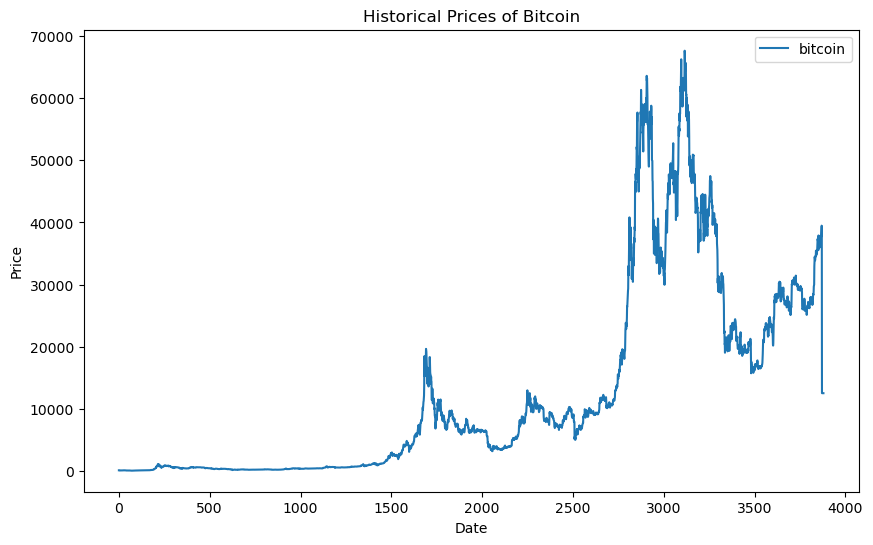

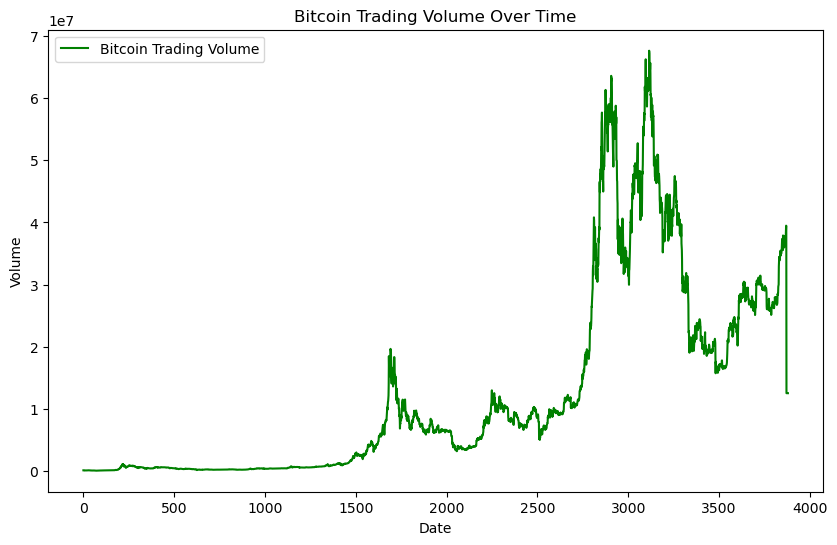

Identified Bitcoin price outliers:
                    timestamp  bitcoin_price  bitcoin_volume  \
2875  2021-03-14 00:00:00.000   61315.197933    6.131520e+07   
2903  2021-04-11 00:00:00.000   59979.392816    5.997939e+07   
2904  2021-04-12 00:00:00.000   59988.020959    5.998802e+07   
2905  2021-04-13 00:00:00.000   59911.020595    5.991102e+07   
2906  2021-04-14 00:00:00.000   63576.676041    6.357668e+07   
2907  2021-04-15 00:00:00.000   62807.123233    6.280712e+07   
2908  2021-04-16 00:00:00.000   63179.772446    6.317977e+07   
2909  2021-04-17 00:00:00.000   61497.299569    6.149730e+07   
2910  2021-04-18 00:00:00.000   60273.866677    6.027387e+07   
3091  2021-10-16 00:00:00.000   61809.023944    6.180902e+07   
3092  2021-10-17 00:00:00.000   61165.635642    6.116564e+07   
3093  2021-10-18 00:00:00.000   61583.774440    6.158377e+07   
3094  2021-10-19 00:00:00.000   62017.972725    6.201797e+07   
3095  2021-10-20 00:00:00.000   64517.648560    6.451765e+07   
3096 

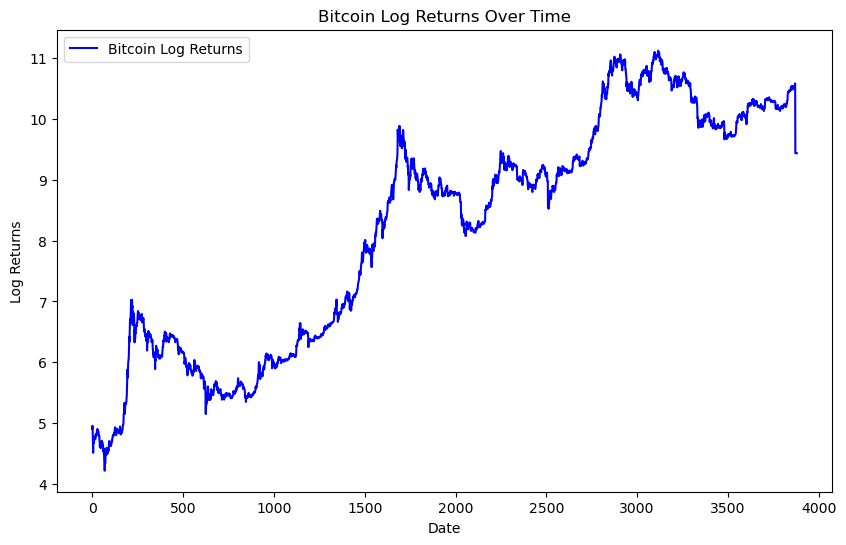

C:\Users\hp\AppData\Local\Temp\ipykernel_4044\1007540894.py:172: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  self.data.fillna(self.data.mean(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4044\1007540894.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data.fillna(self.data.mean(), inplace=True)


Cleaning Ethereum data...
Transforming Ethereum log returns...
Mean return for Ethereum: 5.796725633629855
Median return for Ethereum: 6.815497087129903
Standard deviation of return for Ethereum: 2.0412667085751344
Index with the highest return for Ethereum: 3115
Highest return for Ethereum: 8.479492286707824
Volatility of Ethereum: 2.0412667085751344


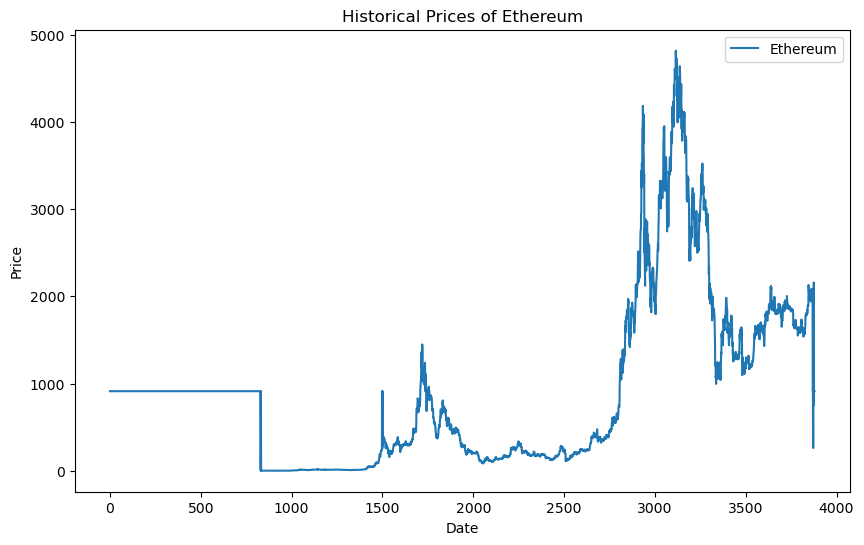

KeyError: 'Ethereum_volume'

<Figure size 1000x600 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

# class for loading data
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = self.load_data()

    def load_data(self):
        try:
            df = pd.read_csv(self.file_path)
            return df
        except FileNotFoundError:
            print("File not found.")
            return None

class CryptoAsset:
    def __init__(self, data):
        self.data = data

    def clean_data(self):
        pass

    def transform_log_returns(self):
        pass

    def calculate_statistics(self):
        pass

    def identify_highest_return_date(self):
        pass
    
    
class Bitcoin(CryptoAsset):
    def __init__(self, data):
        super().__init__(data)

    def clean_data(self):
        # filling missing values with mean
        self.data.fillna(self.data.mean(), inplace=True)
        print("Cleaning Bitcoin data...")

    def calculate_volume(self):
        # calculating volume based on Bitcoin price data 
        self.data['bitcoin_volume'] = self.data['bitcoin_price'] * 1000 
        print("Calculated Bitcoin volume....")

    def transform_log_returns(self):
        # Bitcoin log return transformation...
        self.data['bitcoin_log_returns'] = self.data['bitcoin_price'].apply(lambda x: np.log(x) if x > 0 else np.nan)
        print("Transforming Bitcoin log returns...")

    def fetch_sentiment_data(self):
        endpoint = 'https://sentiment-api.com/api/v1/bitcoin_sentiment'
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.9999.999 Safari/537.36 OPR/99.0.9999.999'
        }
        try:
            response = requests.get(endpoint, headers=headers)

            if response.status_code == 200:
                return response.json()
            else:
                print(f"Failed to fetch sentiment data. Status code: {response.status_code}")
                return None
        except requests.exceptions.RequestException as e:
            print(f"Request Exception: {e}")
            return None
        
    def calculate_statistics(self):
        mean_return = self.data['bitcoin_log_returns'].mean()
        median_return = self.data['bitcoin_log_returns'].median()
        std_dev_return = self.data['bitcoin_log_returns'].std()
        print(f"Mean return for Bitcoin: {mean_return}")
        print(f"Median return for Bitcoin: {median_return}")
        print(f"Standard deviation of return for Bitcoin: {std_dev_return}")

    def identify_highest_return_date(self):
        max_return_index = self.data['bitcoin_log_returns'].idxmax()
        max_return_value = self.data['bitcoin_log_returns'].max()
        print(f"Index with the highest return for Bitcoin: {max_return_index}")
        print(f"Highest return for Bitcoin: {max_return_value}")

    def plot_historical_prices(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.data.index, self.data['bitcoin_price'], label='bitcoin')
        plt.title("Historical Prices of Bitcoin")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()
    
    def calculate_volatility(self):
        volatility = self.data['bitcoin_log_returns'].std()
        print(f"Volatility for Bitcoin: {volatility}")

    def moving_average(self):
        self.data['bitcoin_7_day_ma'] = self.data['bitcoin_price'].rolling(window=7).mean()
        print("Computed 7-day moving average for Bitcoin")

    def visualize_returns(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.data.index, self.data['bitcoin_log_returns'], label='Bitcoin Log Returns', color='blue')
        plt.title("Bitcoin Log Returns Over Time")
        plt.xlabel("Date")
        plt.ylabel("Log Returns")
        plt.legend()
        plt.show()

    def identify_price_outliers(self):
        
        threshold = 3  
        mean_price = self.data['bitcoin_price'].mean()
        std_price = self.data['bitcoin_price'].std()
        outliers = self.data[(self.data['bitcoin_price'] > mean_price + threshold * std_price) |
                             (self.data['bitcoin_price'] < mean_price - threshold * std_price)]
        print("Identified Bitcoin price outliers:")
        print(outliers)

    def analyze_trading_volume(self):
        # Analyze Bitcoin trading volume patterns
        # Example: Visualize trading volume trends over time
        plt.figure(figsize=(10, 6))
        plt.plot(self.data.index, self.data['bitcoin_volume'], label='Bitcoin Trading Volume', color='green')
        plt.title("Bitcoin Trading Volume Over Time")
        plt.xlabel("Date")
        plt.ylabel("Volume")
        plt.legend()
        plt.show()
    

    def sentiment_analysis(self):
        sentiment_data = self.fetch_sentiment_data()
        if sentiment_data:
            sentiment_score = self.analyze_sentiment(sentiment_data)
            self.visualize_sentiment(sentiment_score)
        else:
            print("No sentiment data available.")

    def fetch_sentiment_data(self):
        endpoint = 'https://sentiment-api.com/api/v1/bitcoin_sentiment'
        headers = {'Authorization': 'API_KEY'}
        response = requests.get(endpoint, headers=headers)

        if response.status_code == 200:
            return response.json()
        else:
            print("Failed to fetch sentiment data.")
            return None

    def analyze_sentiment(self, sentiment_data):
        sentiment_score = sentiment_data.get('sentiment_score', 0.0)
        return sentiment_score

    def visualize_sentiment(self, sentiment_score):
        plt.figure(figsize=(8, 6))
        plt.bar('Bitcoin Sentiment', sentiment_score, color='orange')
        plt.title("Bitcoin Sentiment Analysis")
        plt.ylabel("Sentiment Score")
        plt.show()

        
class Ethereum(CryptoAsset):
    def __init__(self, data):
        super().__init__(data)

    def clean_data(self):
        self.data.fillna(self.data.mean(), inplace=True)
        print("Cleaning Ethereum data...")
        
    def calculate_volume(self):
       
        self.data['ethereum_volume'] = self.data['ethereum_price'] * 500  
        print("Calculated Ethereum volume.")

    def transform_log_returns(self):
        self.data['ethereum_log_returns'] = self.data['ethereum_price'].apply(lambda x: np.log(x) if x > 0 else np.nan)
        print("Transforming Ethereum log returns...")

    def calculate_statistics(self):
        mean_return = self.data['ethereum_log_returns'].mean()
        median_return = self.data['ethereum_log_returns'].median()
        std_dev_return = self.data['ethereum_log_returns'].std()
        print(f"Mean return for Ethereum: {mean_return}")
        print(f"Median return for Ethereum: {median_return}")
        print(f"Standard deviation of return for Ethereum: {std_dev_return}")

    def identify_highest_return_date(self):
        max_return_index = self.data['ethereum_log_returns'].idxmax()
        max_return_value = self.data['ethereum_log_returns'].max()
        print(f"Index with the highest return for Ethereum: {max_return_index}")
        print(f"Highest return for Ethereum: {max_return_value}")

    def plot_historical_prices(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.data.index, self.data['ethereum_price'], label='Ethereum')
        plt.title("Historical Prices of Ethereum")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()
        
    def calculate_volatility(self):
        volatility = self.data['ethereum_log_returns'].std()
        print(f"Volatility of Ethereum: {volatility}")

    def analyze_trading_volume(self):
        # Analyze Bitcoin trading volume patterns
        # Example: Visualize trading volume trends over time
        plt.figure(figsize=(10, 6))
        plt.plot(self.data.index, self.data['Ethereum_volume'], label='Ethereum Trading Volume', color='green')
        plt.title("Bitcoin Trading Volume Over Time")
        plt.xlabel("Date")
        plt.ylabel("Volume")
        plt.legend()
        plt.show()
    

    def fetch_sentiment_data(self):
        endpoint = 'https://sentiment-api.com/api/v1/ethereum_sentiment'
        headers = {'Authorization': 'API_KEY'}
        response = requests.get(endpoint, headers=headers)

        if response.status_code == 200:
            return response.json()
        else:
            print("Failed to fetch sentiment data.")
            return None

    def analyze_sentiment(self, sentiment_data):
        sentiment_score = sentiment_data.get('sentiment_score', 0.0)
        return sentiment_score

    def visualize_sentiment(self, sentiment_score):
        plt.figure(figsize=(8, 6))
        plt.bar('Ethereum Sentiment', sentiment_score, color='green')
        plt.title("Ethereum Sentiment Analysis")
        plt.ylabel("Sentiment Score")
        plt.show()



class Ripple(CryptoAsset):
    def __init__(self, data):
        super().__init__(data)

   
    def clean_data(self):
        self.data.fillna(self.data.mean(), inplace=True)
        print("Cleaning Ripple data...")
    
    def calculate_volume(self):
        self.data['ripple_volume'] = self.data['ripple_price'] * 200  
        print("Calculated Ripple volume.")


    def detect_price_patterns(self):
        window = 7  
        self.data['ripple_7_day_ma'] = self.data['ripple_price'].rolling(window=window).mean()
        self.data['ripple_price_above_ma'] = self.data['ripple_price'] > self.data['ripple_7_day_ma']
        print("Detecting price patterns for Ripple...")
        print(self.data[['timestamp', 'ripple_price', 'ripple_7_day_ma', 'ripple_price_above_ma']])
        
    def transform_log_returns(self):
        self.data['ripple_log_returns'] = self.data['ripple_price'].apply(lambda x: np.log(x) if x > 0 else np.nan)
        print("Transforming Ripple log returns...")

    def calculate_statistics(self):
        mean_return = self.data['ripple_log_returns'].mean()
        median_return = self.data['ripple_log_returns'].median()
        std_dev_return = self.data['ripple_log_returns'].std()
        print(f"Mean return for Ripple: {mean_return}")
        print(f"Median return for Ripple: {median_return}")
        print(f"Standard deviation of return for Ripple: {std_dev_return}")

    def identify_highest_return_date(self):
        max_return_index = self.data['ripple_log_returns'].idxmax()
        max_return_value = self.data['ripple_log_returns'].max()
        print(f"Index with the highest return for Ripple: {max_return_index}")
        print(f"Highest return for Ripple: {max_return_value}")

    def plot_historical_prices(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.data.index, self.data['ripple_price'], label='Ripple')
        plt.title("Historical Prices of Ripple")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.show()
        
    def calculate_volatility(self):
        volatility = self.data['ripple_log_returns'].std()
        print(f"Volatility of Ripple: {volatility}")

    
    def fetch_sentiment_data(self):
        endpoint = 'https://sentiment-api.com/api/v1/ripple_sentiment'
        headers = {'Authorization': 'API_KEY'}
        response = requests.get(endpoint, headers=headers)

        if response.status_code == 200:
            return response.json()
        else:
            print("Failed to fetch sentiment data! ")
            return None

    def analyze_sentiment(self, sentiment_data):
        sentiment_score = sentiment_data.get('sentiment_score', 0.0)
        return sentiment_score

    def visualize_sentiment(self, sentiment_score):
        plt.figure(figsize=(8, 6))
        plt.bar('Ripple Sentiment', sentiment_score, color='purple')
        plt.title("Ripple Sentiment Analysis")
        plt.ylabel("Sentiment Score")
        plt.show()

        
class CryptoAnalysis:
    def __init__(self, crypto_assets):
        self.crypto_assets = crypto_assets
        self.merged_data = pd.DataFrame()  # Initialize an empty DataFrame for merged data

    def perform_analysis(self):
        for asset in self.crypto_assets:
            asset.clean_data()
            asset.transform_log_returns()
            asset.calculate_statistics()
            asset.identify_highest_return_date()
            asset.calculate_volatility()
            asset.plot_historical_prices()
            asset.analyze_trading_volume()
            asset.identify_price_outliers()
            asset.moving_average()
            asset.visualize_returns()
            
            #asset.sentiment_analysis()

            # Storing processed data for each asset
            asset_data = asset.data.copy()
            asset_data['Crypto'] = asset.__class__.__name__  # Add a column to identify the asset
            if self.merged_data.empty:
                self.merged_data = asset_data
            else:
                # Merge cleaned/processed data with original data, replacing only where necessary
                self.merged_data = pd.concat([self.merged_data, asset_data]).drop_duplicates(subset=['timestamp'],
                                                                                               keep='last')

        # Save the merged data to a CSV file
        self.merged_data.to_csv('processed_data.csv', index=False)


def main():
    data_loader = DataLoader('data.csv')

    if data_loader.data is not None:
        bitcoin_data = data_loader.data[['timestamp', 'bitcoin_price']]
        ethereum_data = data_loader.data[['timestamp', 'ethereum_price']]
        ripple_data = data_loader.data[['timestamp', 'ripple_price']]

        bitcoin = Bitcoin(bitcoin_data)
        ethereum = Ethereum(ethereum_data)
        ripple = Ripple(ripple_data)

        bitcoin.calculate_volume()
        ethereum.calculate_volume()
        ripple.calculate_volume()

        analysis = CryptoAnalysis([bitcoin, ethereum, ripple])
        analysis.perform_analysis()
    else:
        print("Error loading data. Please check file paths and try again.")

        
        
if __name__ == "__main__":
    main()